In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter

url = "https://raw.githubusercontent.com/Naik-Khyati/608/main/story6/input/story6_data.csv"
data = pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fips_st              51 non-null     int64  
 1   state_name           51 non-null     object 
 2   state_abb            51 non-null     object 
 3   pov_2021             51 non-null     float64
 4   c_fins_2021          51 non-null     float64
 5   oa_fins_2021         51 non-null     float64
 6   s_fins_2021          51 non-null     float64
 7   o_fins_2021          51 non-null     float64
 8   cnt_o_fins_2021      51 non-null     int64  
 9   pov_rank             51 non-null     int64  
 10  pov_bin              51 non-null     object 
 11  cnt_pop_o_fins_2021  51 non-null     int64  
 12  cnt_c_fins_2021      51 non-null     int64  
 13  cnt_s_fins_2021      51 non-null     int64  
 14  cnt_pop_c_fins_2021  51 non-null     int64  
 15  cnt_pop_s_fins_2021  51 non-null     int64

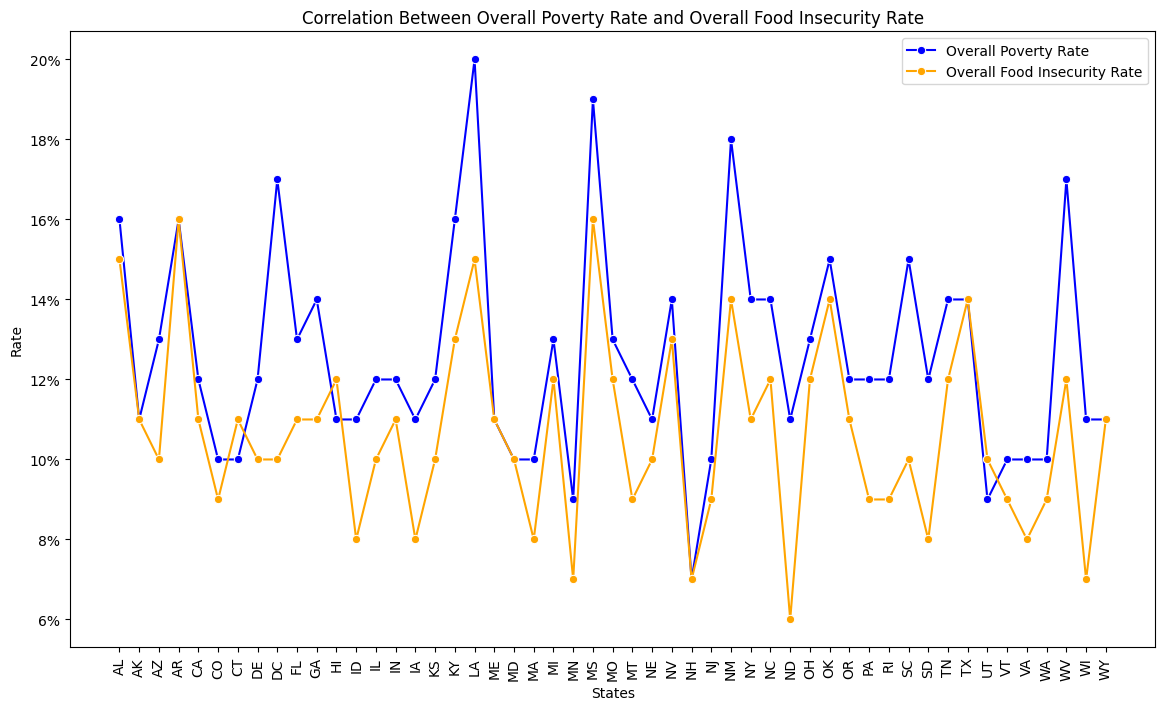

Overall Correlation Strength: 0.77


In [14]:
# Calculate the correlation between pov_2021 and o_fins_2021
correlation_strength = data[['pov_2021', 'o_fins_2021']].corr().iloc[0, 1]

# Set the size of the figure
plt.figure(figsize=(14, 8))

# Plotting overall poverty rate
sns.lineplot(x='state_abb', y='pov_2021', data=data, label='Overall Poverty Rate', marker='o', color='blue')

# Plotting overall food insecurity rate
sns.lineplot(x='state_abb', y='o_fins_2021', data=data, label='Overall Food Insecurity Rate', marker='o', color='orange')

# Adding labels and title
plt.xlabel('States')
plt.ylabel('Rate')

# Formatting y-axis as percentage
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.title('Correlation Between Overall Poverty Rate and Overall Food Insecurity Rate')
plt.xticks(rotation=90)

# Adding legend
plt.legend()

# Show the plot
plt.show()

# Print overall correlation strength
print(f"Overall Correlation Strength: {correlation_strength:.2f}")


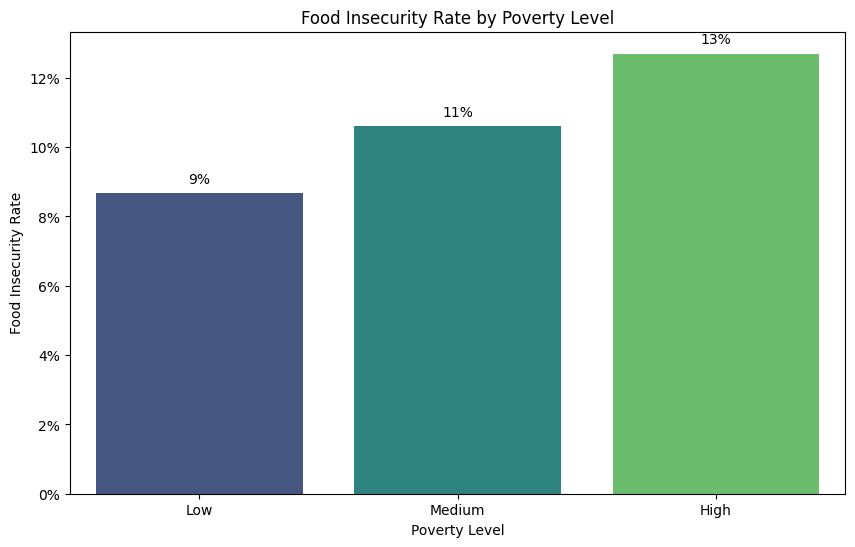

In [15]:
# Group by pov_bin and calculate the sum of cnt_o_fins_2021 and cnt_pop_o_fins_2021
df_chart = data.groupby('pov_bin').agg({
    'cnt_o_fins_2021': 'sum',
    'cnt_pop_o_fins_2021': 'sum',
    'cnt_c_fins_2021': 'sum',
    'cnt_s_fins_2021': 'sum',
    'cnt_pop_c_fins_2021': 'sum',
    'cnt_pop_s_fins_2021': 'sum'
}).reset_index()

# Calculate the food_insecurity_rate column
df_chart['o_fsi_rate'] = df_chart['cnt_o_fins_2021'] / df_chart['cnt_pop_o_fins_2021']

# Calculate the food_insecurity_rate column
df_chart['c_fsi_rate'] = df_chart['cnt_c_fins_2021'] / df_chart['cnt_pop_c_fins_2021']

# Calculate the food_insecurity_rate column
df_chart['s_fsi_rate'] = df_chart['cnt_s_fins_2021'] / df_chart['cnt_pop_s_fins_2021']


# Define the order of pov_bin categories
pov_bin_order = ['Low', 'Medium', 'High']

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a bar plot
ax = sns.barplot(x='pov_bin', y='o_fsi_rate', data=df_chart, order=pov_bin_order, palette='viridis')

# Adding labels and title
plt.xlabel('Poverty Level')
plt.ylabel('Food Insecurity Rate')
plt.title('Food Insecurity Rate by Poverty Level')

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))

# Add labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

In [16]:
print(df_chart)

  pov_bin  cnt_o_fins_2021  cnt_pop_o_fins_2021  cnt_c_fins_2021  \
0    High         15927820            125466607          4726100   
1     Low          6061060             69929879          1578060   
2  Medium         13916820            131323592          3810250   

   cnt_s_fins_2021  cnt_pop_c_fins_2021  cnt_pop_s_fins_2021  o_fsi_rate  \
0          2212886             29071822             27856725    0.126949   
1           910209             15285617             16387608    0.086673   
2          2236722             29101157             32505093    0.105973   

   c_fsi_rate  s_fsi_rate  
0    0.162566    0.079438  
1    0.103238    0.055543  
2    0.130931    0.068811  


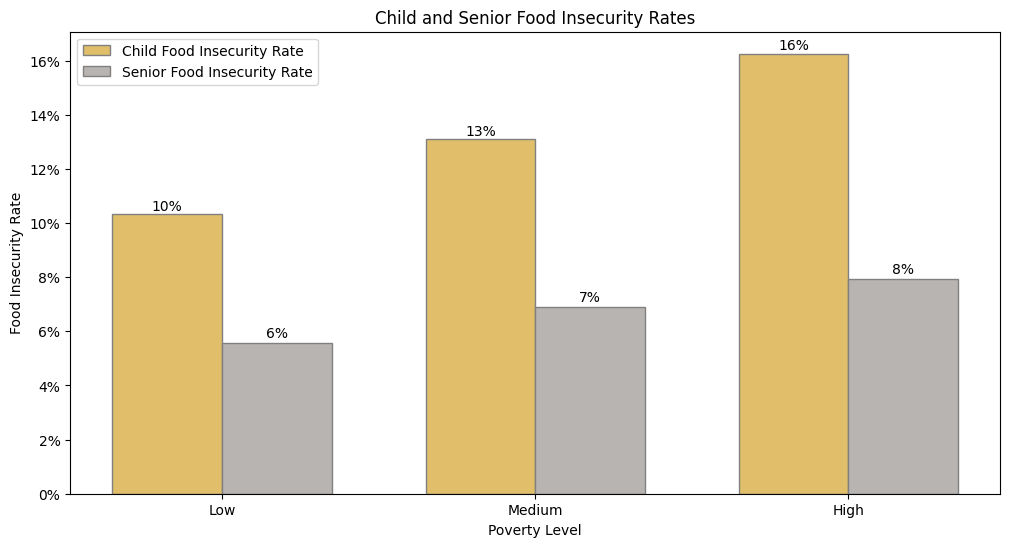

Overall Correlation Strength: 0.57


In [17]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Define the positions for the bars
bar_width = 0.35
r1 = np.arange(len(df_chart))
r2 = [x + bar_width for x in r1]

# Calculate the difference between child and senior food insecurity rates
df_chart['fins_diff'] = df_chart['c_fsi_rate'] - df_chart['s_fsi_rate']

# Sort the data by the difference
df_chart = df_chart.sort_values(by='fins_diff', ascending=True)

# Plotting child food insecurity rate
plt.bar(r1, df_chart['c_fsi_rate'], color='#E1BE6A', width=bar_width, edgecolor='grey', label='Child Food Insecurity Rate')

# Plotting senior food insecurity rate
plt.bar(r2, df_chart['s_fsi_rate'], color='#B7B4B1', width=bar_width, edgecolor='grey', label='Senior Food Insecurity Rate')

# Adding labels and title
plt.xlabel('Poverty Level')
plt.ylabel('Food Insecurity Rate')
plt.title('Child and Senior Food Insecurity Rates')
plt.xticks([r + bar_width/2 for r in range(len(df_chart))], df_chart['pov_bin'])

# Formatting y-axis as percentage
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Add data labels
for i, value in enumerate(df_chart['c_fsi_rate']):
    plt.text(i, value + 0.0005, f'{value:.0%}', ha='center', va='bottom')

for i, value in enumerate(df_chart['s_fsi_rate']):
    plt.text(i + bar_width, value + 0.001, f'{value:.0%}', ha='center', va='bottom')

# Show the plot
plt.legend()
plt.show()

# Calculate the correlation between pov_2021 and o_fins_2021
correlation_strength = data[['c_fins_2021', 's_fins_2021']].corr().iloc[0, 1]
# Print overall correlation strength
print(f"Overall Correlation Strength: {correlation_strength:.2f}")

<ipython-input-18-4b3f5d30a240>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_poverty_data['fins_diff'] = high_poverty_data['c_fins_2021'] - high_poverty_data['s_fins_2021']


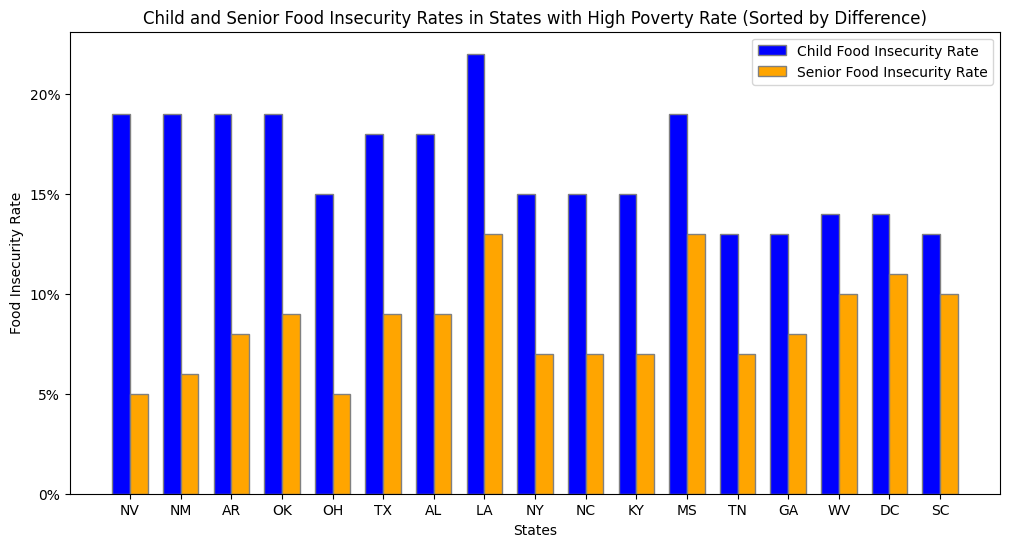

In [18]:
# Filter data to include only states with high poverty level
high_poverty_data = data[data['pov_bin'] == "High"]

# Calculate the difference between child and senior food insecurity rates
high_poverty_data['fins_diff'] = high_poverty_data['c_fins_2021'] - high_poverty_data['s_fins_2021']

# Sort the data by the difference
high_poverty_data = high_poverty_data.sort_values(by='fins_diff', ascending=False)

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Define the positions for the bars
bar_width = 0.35
r1 = np.arange(len(high_poverty_data))
r2 = [x + bar_width for x in r1]

# Plotting child food insecurity rate
plt.bar(r1, high_poverty_data['c_fins_2021'], color='blue', width=bar_width, edgecolor='grey', label='Child Food Insecurity Rate')

# Plotting senior food insecurity rate
plt.bar(r2, high_poverty_data['s_fins_2021'], color='orange', width=bar_width, edgecolor='grey', label='Senior Food Insecurity Rate')

# Adding labels and title
plt.xlabel('States')
plt.ylabel('Food Insecurity Rate')
plt.title('Child and Senior Food Insecurity Rates in States with High Poverty Rate (Sorted by Difference)')
plt.xticks([r + bar_width/2 for r in range(len(high_poverty_data))], high_poverty_data['state_abb'])

# Formatting y-axis as percentage
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Show the plot
plt.legend()
plt.show()
